Hi Robert, 

I have found a bug with clesperanto filters. When I filter the image (e.g., by cle.top_hat_box) and try to add them in napari the outcome basically different. The way I circumvented it for now is by exporting them as tifs first and then load them to napari. Then the images look normal.

Thought you might still wanted it to know. :)

Best,
Flo

In [1]:
from skimage.io import imread
import numpy as np
import os
from tifffile import imwrite
import pyclesperanto_prototype as cle
import napari

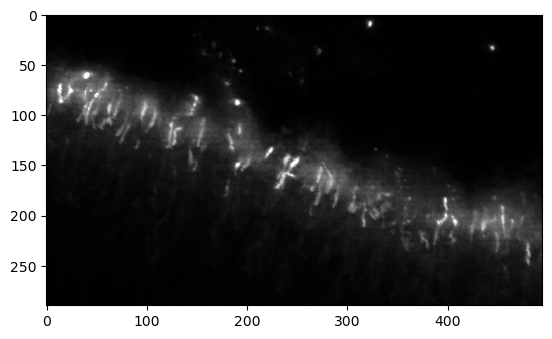

In [2]:
#load the image and show it
image = imread("data/high-background-test-images/C1-p16-20x-zoom-suse-2.2-C.tif")
cle.imshow(image)

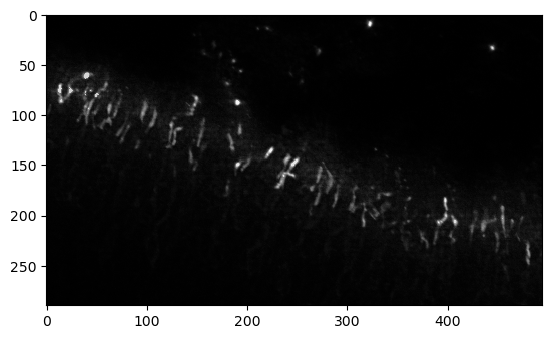

In [3]:
#subtract the background
image = cle.top_hat_box(image, radius_x=3, radius_y=3, radius_z=3)
cle.imshow(image)

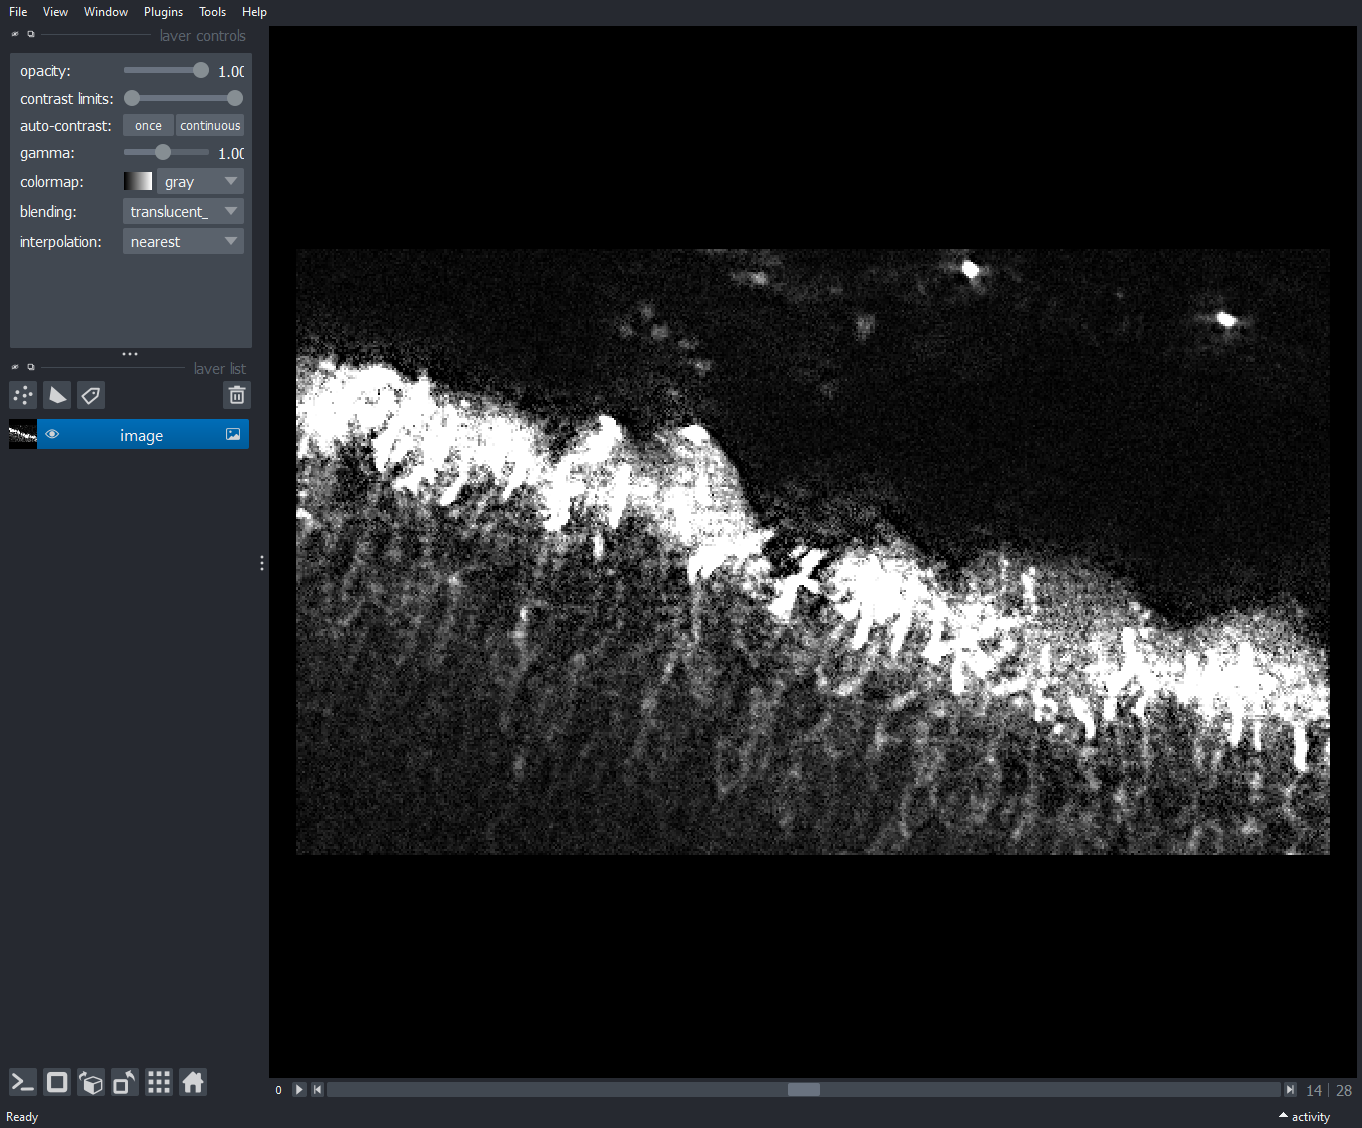

In [4]:
viewer = napari.Viewer()
viewer.add_image(image)
napari.utils.nbscreenshot(viewer)

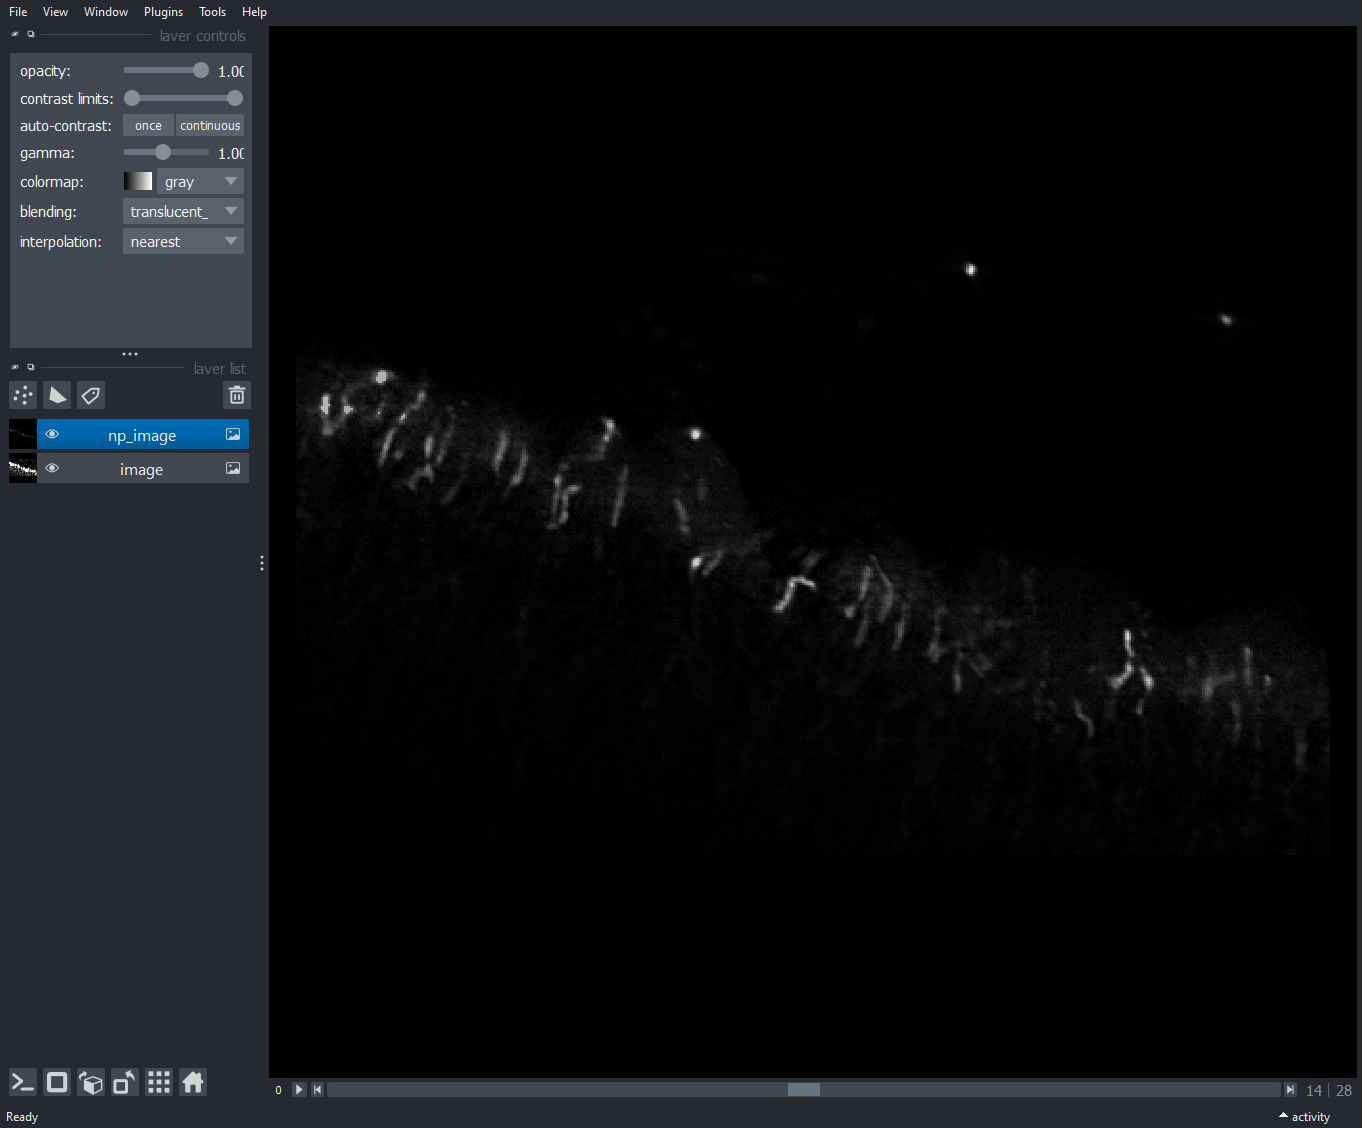

In [5]:
np_image = np.asarray(image)

viewer.add_image(np_image)
napari.utils.nbscreenshot(viewer)

In [6]:
test_folder = "data/test/"
imwrite(test_folder + "test.tif", image)

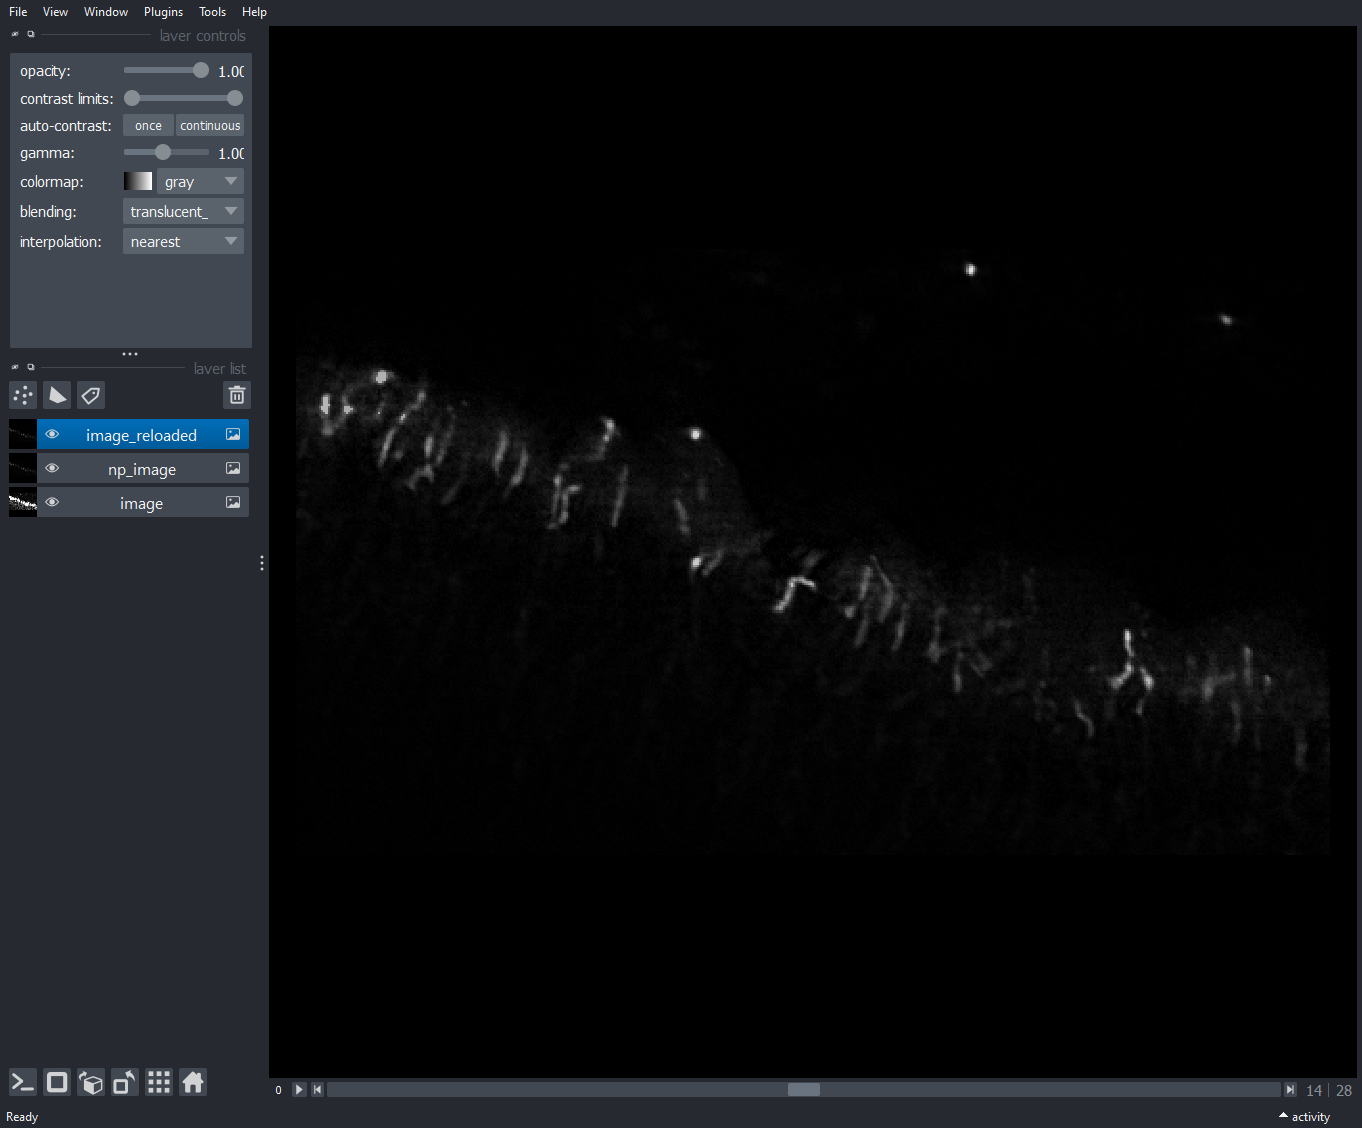

In [7]:
image_reloaded = imread("data/test/test.tif")
viewer.add_image(image_reloaded)
napari.utils.nbscreenshot(viewer)

In [8]:
cle.array_equal(image, np_image)

True

In [9]:
cle.array_equal(image, image_reloaded)

True